<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на "ТЫ". Если это неприемлемо, обязательно напиши мне в комментариях - мы прейдем на "ВЫ".

🤝Спасибо, что сдал проект вовремя. Тобой проделана хорошая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:
## <span style="color:green">Отличная работа<span>
    Безупречная работа
## <span style="color:orange">Что можно улучшить<span>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить.
## <span style="color:red">Что необходимо доработать<span>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге, чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их.
   
Поехали! :)

<hr style="border: 2px solid green;" />

### Шаг 1. Открываем файл с данными и изучаем общую информацию

#### <span style="color:blue">Честно говоря, не очень понял цель упражнения, помимо цели вспомнить, как строить графики. Поэтому, если я неправильно понял, буду благодарен за наводку :) </span>

## <span style="color:green">Комментарий<span>
Данный проект состоит из нескольких частей (SQL, парсер и питоновская часть), поэтому данная часть служит для закрепления материала и практики кода.
    
Спринт охватывает тему сбора данных, его можно было применить и здесь, например, проверить гипотезу о связи кол-ва рейсов и численности населения города или связать характеристики самолетов с их числом рейсов.

## <span style="color:red">Что необходимо доработать<span>
Пожалуйста, при загрузке работы меняй пути к данным на проектные - `/datasets/data.csv`.

#### <span style="color:blue">Прошу прощения, ранее загружал и проблем таких не было выявлено. Поправил </span>

## <span style="color:green">Отличная работа 2<span>
Спасибо✅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

MODEL = pd.read_csv('/datasets/query_1.csv').sort_values(by='flights_amount', ascending=False)
CITY = pd.read_csv('/datasets/query_3.csv').sort_values(by='average_flights', ascending=False)

display(MODEL.sort_values(by='flights_amount', ascending=False))
display(CITY.head(10))

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Проверям пропуски и корректность данных

In [2]:
MODEL.info()
CITY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 6 to 4
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 43 to 49
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


Все данные выгляджят корректными и без пропусков, поэтому можем приступать к анализу

### Шаг 2. Исследовательский анализ данных

In [3]:
cities_top_10 = list(CITY['city'][0:10]) #Топ 10 городов по среднему количеству рейсов

Строми график модели самолетов - количество рейсов

Text(0.5, 1.0, 'TOP AIRCRAFTS by FLIGHTS ')

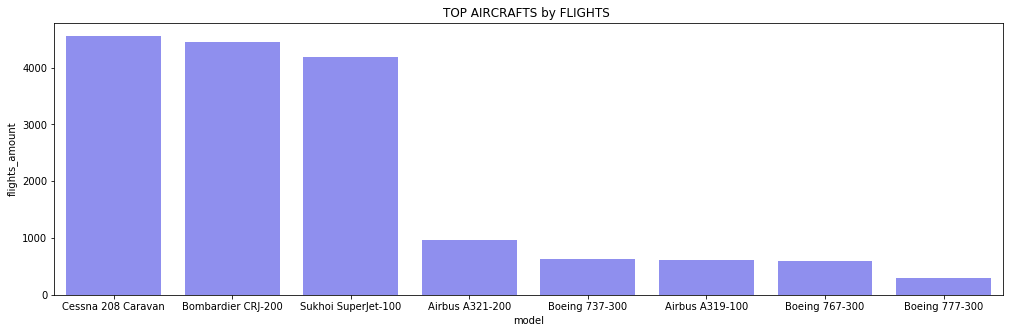

In [4]:
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(x='model', y='flights_amount', data=MODEL, color="BLUE", 
            linewidth=3, alpha=0.5).set_title('TOP AIRCRAFTS by FLIGHTS ')

##### Вывод:
Наиболее популярные модели самолетов:
- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100

Все модели самолетов располагаются от менее вместительного и часто используемого к более вместительному и менее используемому. Очень мало используется габаритных моделей, несмотря на большие расстояния между крупными административными центрами.



Text(0.5, 1.0, 'TOP CITIES by FLIGHTS')

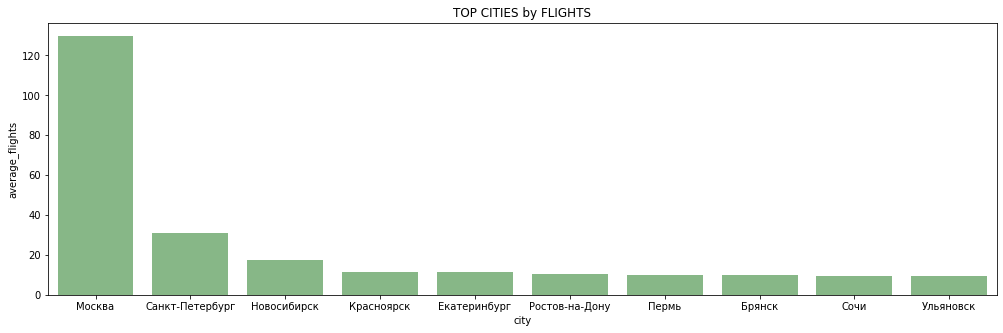

In [5]:
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(x='city', y='average_flights', data=CITY.query('city in @cities_top_10'), color="GREEN", 
            linewidth=3, alpha=0.5).set_title('TOP CITIES by FLIGHTS')

##### Вывод:
Ожидаемо главным и единственным воздушным хабом страны оказалась Москва - "Все дороги ведут в Москву".
Далее с огромным отрывом СПБ (как вторая столица РФ и популярного туристического центра) и НОВОСИБ (как главный хаб за уралом, соединяющим страну).
Интересный факт наличия Брянска и Ульяновска в списке, а также отсутствия части городов-миллиоников вне списка. Возможно это связано с наличием инфраструктуры и возможности быстро добраться от главных центров (аля Москва), экономическим состоянием (Волгоград).

## <span style="color:green">Отличная работа 2<span>
В разделах все верно. Здорово, что воспользовался информацией о вместимости самолетов.

Обратил внимание, что при загрузке данных ты уже используешь сортировку (и потом её повторяешь при выводе) - это говорит, что ты знаешь какие данные тебя ждут и как ты их будешь обрабатывать - немного нарушена логическая цепочка изучения данных.

#### <span style="color:blue">Спасибо за наводку, как раз выше высказывал гипотезы о характеристиках самолета и о зависимости численности города. Давай тогда проверим гипотезу по зависимости города математически  </span>

### Шаг 3. Проверка гипотезы

##### Нулевая гипотзеза:  Среднее количество рейсов в городах миллионниках и остальных городах равны

Спервая необходимо узнать и добавить к существующей базе численность населенных городов

In [6]:
import requests  
from bs4 import BeautifulSoup 

URL='http://www.demoscope.ru/weekly/ssp/rus_urban100.php'

req_page_text = requests.get(URL).text
soup = BeautifulSoup(req_page_text, 'lxml')

headers = []
content = []

for i in soup.find_all('table', attrs={'border':'1'}):
    for header in i.find_all('p', attrs={'align':'center'}):
        headers.append(header.text)

for table in soup.find_all('table', attrs={'border':'1'}):
    for table in table.find_all('tr'):
        for row_data in table.find_all('p'):
            if row_data.text not in headers:
                content.append([data.text for data in table.find_all('p')])
                break

headers.remove('Год')

city_data = pd.DataFrame(columns=headers, data=content) # Формуируем новую таблицу
city_data = city_data.loc[:, ['Город', '2018']] #оставляем данные только по самый актуальный год
display(city_data.head(10))

,Город,2018
0,Москва,12506
1,Санкт-Петербург,5352
2,Новосибирск,1613
3,Екатеринбург,1469
4,Нижний Новгород,1259
5,Казань,1244
6,Челябинск,1202
7,Омск,1172
8,Самара,1163
9,Ростов-на-Дону,1130


Соединим данные и уберем лишнее.
Также добавим индекс, который позволит сравнивать не величины напрямую, а их средние цифры. Это поможет избежать внешних факторов, которые могут сколнить данные в пользу городов миллиоников. Чем меньше индекс, тем выше популярность города у авиаперевозчиков.

In [7]:
city_with_pops = pd.merge(left=CITY, right=city_data, left_on='city', right_on='Город')
city_with_pops = city_with_pops.drop(columns='Город')
city_with_pops.columns = ['city', 'av._flights', 'population_2018']
city_with_pops['population_2018'] = city_with_pops['population_2018'].astype('int')
city_with_pops['av.population_on_1_flight(1k_pops)'] = (city_with_pops['population_2018'] / city_with_pops['av._flights']).astype('int')
display(city_with_pops.head(15))

,city,av._flights,population_2018,av.population_on_1_flight(1k_pops)
0,Москва,129.774194,12506,96
1,Санкт-Петербург,31.161290,5352,171
2,Новосибирск,17.322581,1613,93
3,Красноярск,11.580645,1091,94
4,Екатеринбург,11.322581,1469,129
5,Ростов-на-Дону,10.193548,1130,110
6,Пермь,10.129032,1052,103
7,Брянск,10.000000,406,40
8,Сочи,9.612903,424,44
9,Ульяновск,9.580645,627,65


In [8]:
cities_1M = city_with_pops[city_with_pops['population_2018'] > 1000] #Города с популяцией больше 1М
cities_1M_wo_moscow = city_with_pops[city_with_pops['city'] != 'Москва'] #Города с популяцией больше 1М, кроме Москвы
cities_100K = city_with_pops[(city_with_pops['population_2018'] > 100) 
                             & (city_with_pops['population_2018'] < 1000)] #Города с популяцией меньше 1М

list_1M = len(cities_1M['city'])
cities_top_100K = cities_100K.sort_values(by='av._flights', 
                                          ascending=False).reset_index(drop=True).loc[0:list_1M] # Топ 15 городов по количеству рейсов с популяцией меньше 1М
display(cities_top_100K)

,city,av._flights,population_2018,av.population_on_1_flight(1k_pops)
0,Брянск,10.000000,406,40
1,Сочи,9.612903,424,44
2,Ульяновск,9.580645,627,65
3,Сургут,8.741935,366,41
4,Новый Уренгой,8.290323,115,13
5,Тюмень,6.967742,768,110
6,Хабаровск,6.548387,618,94
7,Новокузнецк,6.032258,554,91
8,Иркутск,6.032258,624,103
9,Белгород,6.000000,392,65


##### Нулевая гипотзеза:  Среднее количество рейсов в городах миллионниках и остальных городах равны

##### Проверяем гипотезу с разным набором данных
Выборки у нас незавсимимые, поэтмоу используем метод scipy.stats.ttest_ind:

Набор данных #1: все города до 1М и все города больше 1М на основании количества совершенных рейсов


In [9]:
from scipy import stats as st

#Проводим расчеты
alpha = 0.05

results = st.ttest_ind(cities_1M['av._flights'], cities_100K['av._flights'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.0010384605514450521
Отвергаем нулевую гипотезу


Очевидно, что среднее количество рейсов в городах миллионниках не равно, значительно в пользу крупных городов. Что же будет, если убрать из списка Москву?

In [10]:
from scipy import stats as st

#Проводим расчеты
alpha = 0.05

results = st.ttest_ind(cities_1M_wo_moscow['av._flights'], cities_100K['av._flights'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.08733984746265121
Не получилось отвергнуть нулевую гипотезу


В данном случае мы видим, что города миллионники без Москвы не обладают таким преимуществом.
Что будет, если оставить в городах <1M только топ города по количеству рейсов, а к городам миллионикам снова прибавить Москву?

In [11]:
from scipy import stats as st

#Проводим расчеты
alpha = 0.05

results = st.ttest_ind(cities_1M['av._flights'], cities_top_100K['av._flights'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.195866130022564
Не получилось отвергнуть нулевую гипотезу


Верно утверждение, что топ 15 городов из регонов по количеству рейсов не уступает по средним рейсам из городов миллионников. Что будет, если сравнить индексы >1М и 1<M?

In [12]:
from scipy import stats as st

#Проводим расчеты
alpha = 0.05

results = st.ttest_ind(cities_1M['av.population_on_1_flight(1k_pops)'], cities_100K['av.population_on_1_flight(1k_pops)'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.16329165215762417
Не получилось отвергнуть нулевую гипотезу


Видим, что сведя среднее к популяции гипотезу о равенстве средних рейсов отклонить не удалось

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Работа выполнена хорошо. Очень круто, что ты подошел математически к проверки гипотезы, еще и придумав метрику👍

Поздравляю, проект принят🚀